<a href="https://colab.research.google.com/github/IshaanA-projects/LinearRegression/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
  def __init__(self, parameters, features, labels):
    self.parameters = parameters
    self.features = features
    self.labels = labels

  def forward(self):
      outputs = np.array([])
      for example in self.features:
        output = example * self.parameters[1] + self.parameters[0]
        outputs = np.append(outputs, output)
      return outputs

  def Cost(self, outputs):
    cost = 0
    for example in range(len(outputs)):
      cost += 0.5 * (outputs[example]-self.labels[example])**2
    return cost

  def SGD(self, outputs, learning_rate):
    for i in range(len(self.features)):
      self.parameters[0] -= learning_rate * (outputs[i]-self.labels[i])
      self.parameters[1] -= learning_rate * (outputs[i]-self.labels[i])*self.features[i]


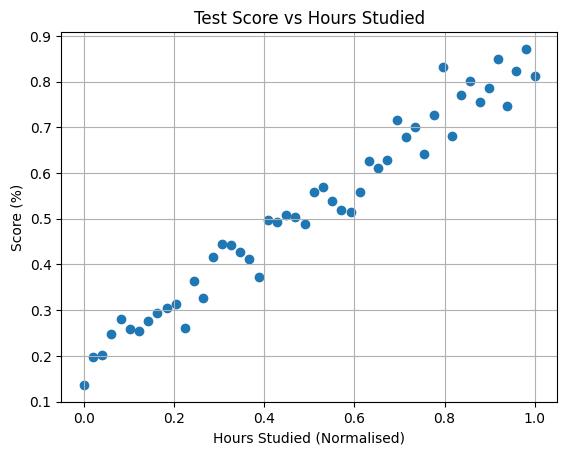

array([-6.33945274, -1.49181   , -2.55349558,  0.80190658,  2.72085533,
       -0.81984398, -2.61483003, -1.86319025, -1.39468463, -1.75505789,
       -2.20805   , -8.66671934,  0.13413995, -4.96941453,  2.61059961,
        4.07977232,  2.60371532, -0.21658553, -3.13985274, -8.39078825,
        2.5997999 ,  0.96825302,  1.12392323, -0.76440001, -3.64101565,
        2.03379809,  1.69698427, -2.60115348, -5.97394282, -7.75126116,
       -4.80988064,  0.67818481, -2.14493168, -1.77351888,  5.62498324,
        0.59678658,  1.30593632, -5.88660861,  1.34093551, 10.47492263,
       -5.97818296,  1.70020126,  3.26150411, -2.62236522, -0.92814701,
        4.14638474, -7.62127952, -1.2384773 ,  2.20497725, -5.05856482])

In [3]:

f = np.linspace(0, 10, 50)  # 50 values from 0 to 10 hours
noise = np.random.normal(0, 4, 50)  # noise with std deviation of 4
w = np.random.uniform(4, 8)
l = w* f + 20 + noise
l = l/100
f = f/10
plt.scatter(f, l)
plt.title("Test Score vs Hours Studied")
plt.xlabel("Hours Studied (Normalised)")
plt.ylabel("Score (%)")
plt.grid(True)
plt.show()
noise

In [4]:
p= np.random.uniform(-2, 2, 2)
model = LinearRegression(p, f, l)

In [5]:
hypothesis = model.forward()
hypothesis

array([-0.1539225 , -0.16316771, -0.17241292, -0.18165813, -0.19090334,
       -0.20014855, -0.20939376, -0.21863896, -0.22788417, -0.23712938,
       -0.24637459, -0.2556198 , -0.26486501, -0.27411022, -0.28335543,
       -0.29260064, -0.30184585, -0.31109106, -0.32033627, -0.32958148,
       -0.33882669, -0.3480719 , -0.35731711, -0.36656231, -0.37580752,
       -0.38505273, -0.39429794, -0.40354315, -0.41278836, -0.42203357,
       -0.43127878, -0.44052399, -0.4497692 , -0.45901441, -0.46825962,
       -0.47750483, -0.48675004, -0.49599525, -0.50524046, -0.51448567,
       -0.52373087, -0.53297608, -0.54222129, -0.5514665 , -0.56071171,
       -0.56995692, -0.57920213, -0.58844734, -0.59769255, -0.60693776])

In [6]:
error = model.Cost(hypothesis)
error

np.float64(23.11528465876963)

23.11528465876963
Learning Rate = 0.02


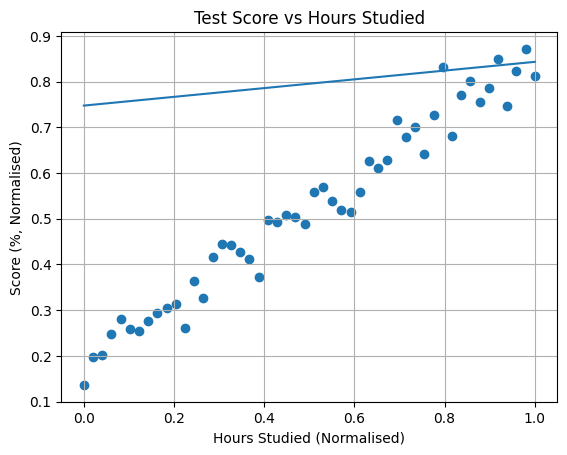

0.06706465337583843
Learning Rate = 0.014794007467765607


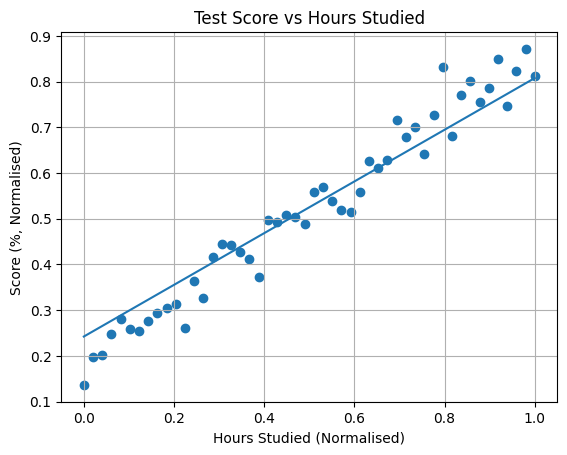

0.03868066864533961
Learning Rate = 0.010943132847815222


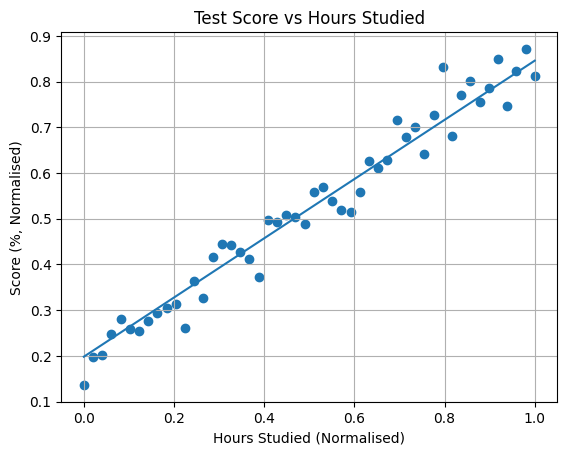

0.03690535032822883
Learning Rate = 0.008094639453566477


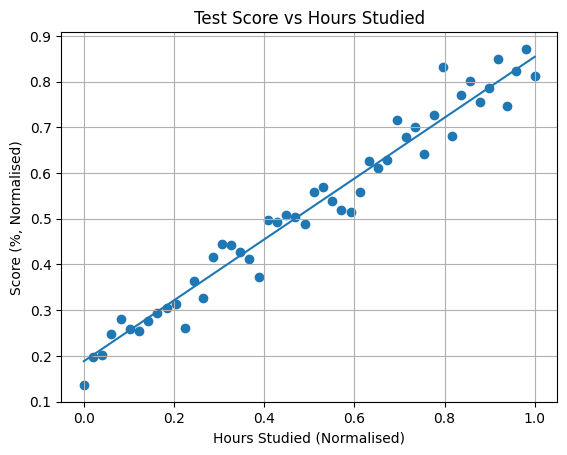

0.03668722888869471
Learning Rate = 0.005987607826246628


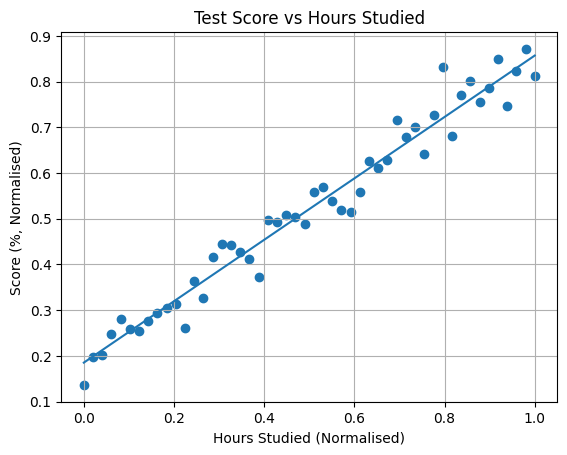

In [7]:
lr = 0.02
for i in range(150):
  hypothesis = model.forward()
  model.SGD(hypothesis, lr)
  if i % 30 == 0:
    print(model.Cost(hypothesis))
    print(f"Learning Rate = {lr}")
    x = np.linspace(0, 1, 50)
    parameters = model.parameters
    weight = parameters[1]
    bias = parameters[0]
    y = np.array([])
    for i in x:
      prediction = i * weight + bias
      y = np.append(y, prediction)
    plt.scatter(f, l)
    plt.plot(x, y)
    plt.title("Test Score vs Hours Studied")
    plt.xlabel("Hours Studied (Normalised)")
    plt.ylabel("Score (%, Normalised)")
    plt.grid(True)
    plt.show()
  lr *= 0.99

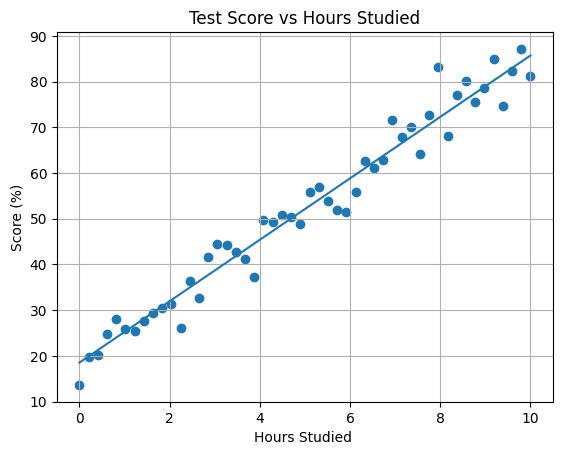

Model's predicted slope: 6.7
Actual slope: 6.6


In [8]:
f *= 10
l *=100
x*=10
y*=100
plt.scatter(f, l)
plt.plot(x, y)
plt.title("Test Score vs Hours Studied")
plt.xlabel("Hours Studied ")
plt.ylabel("Score (%)")
plt.grid(True)
plt.show()

print(f"Model's predicted slope: {round((parameters[1] * 10), 1)}")
print(f"Actual slope: {round(w, 1)}")